In this task we will cover the following subtasks:

This Code cell implements Encoding:

1.Firstly we give a bit string

2.I have generated a typical(Uniolar NRZ scheme) digital signal(Most of the time if we simulate a random digital signal we generally use unipolar NRZ scheme( the positive voltage defines bit 1 and the
zero voltage defines bit O ) )

3.Then The entered Bit string has been encoded by Four Binary/Five Binary(4B/5B) Block coding and simulated this block coded bit string using typical(unipolar NRZ scheme) as previous one.

4.After that, I have encoded the previous Block coded digital signal by polar Non-Return-to-Zero-Invert (NRZ-I) Line coding scheme.

Non-Return-to-Zero-invert(NRZ-i) -- The change or lack of change in the level of the voltage determines the value of the bit. If there is no change, the bit is 0; if there is a change, the bit is 1. I assume that the last voltage level was positive.

![picture](https://drive.google.com/uc?export=view&id=12KkDJPUJWEFSp2oNJizO584uSJq99H8d)



Next Code cell implements decoding:

5.Recieved 4B/5B Block and NRZ-I Line coded digital signal and i have simulated as it is.

6.I have decoded the digital signal from NRZ-I line coding into typical digital signal. But, it is still 4B/5B encoded.So I have to decode it from 4B/5B to get the original digital signal.

7.Finally I have decoded from 4B/5B block coding and get the orinally transmitted Digital signal.We simulate it by using typical unipolar scheme.

Thus I have fully decoded the recieved digital signal and get the entered signal again.We have simulated it also.

Enter a bit string: 100101001
The bit string after 4B/5B Block coding:  1 0 0 1 1 0 1 0 1 0 1


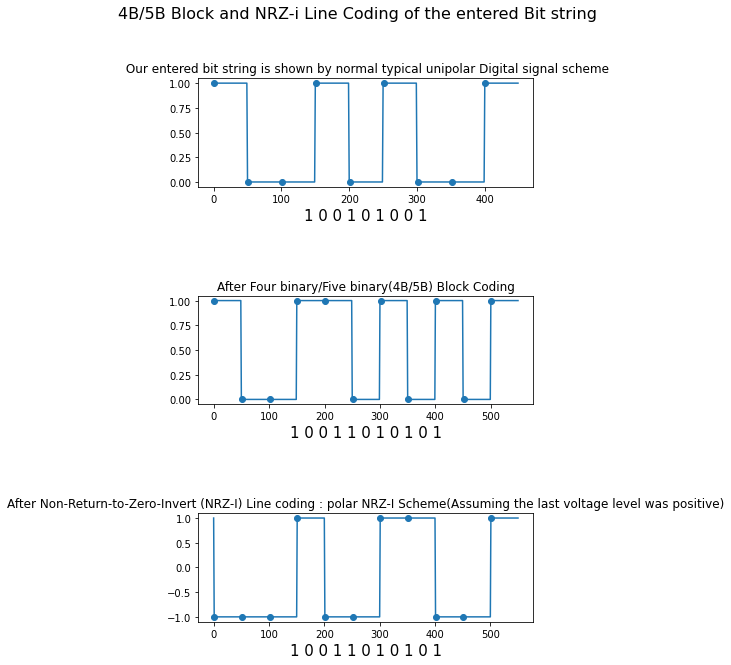

In [10]:
"""

Reg No: 2017331101
Name: Asif Idris Tuhin

"""


import matplotlib.pyplot as plt
import numpy as np
from math import pi



def generate_Signal(bsig):
  sym_len=50

  rand_n=bsig
  
  no_bit=np.size(rand_n)

  #Generate Signal

  sig=np.zeros(sym_len*no_bit)

  id_n=[]
  for i,j in enumerate(rand_n):
    if j=='1':
      id_n.append(i)

  for i in id_n:
    temp1= int(i*sym_len)
    sig[temp1:temp1+sym_len]=1

  return sig



def generate_NRZ_I(bsig):
  sym_len=50

  # inp= input("Enter a bit string: ")
  # rand_n=list(inp)
  rand_n=bsig
  no_bit=np.size(rand_n)

  #Generate Signal

  sig=np.zeros(sym_len*no_bit)

  id_n=[]
  for i,j in enumerate(rand_n):
    if j=='1':
      id_n.append(i)

    

  # 1 pele reverse theke shuru hbe
  sign=-1
  for i in id_n:
    temp= int(i*sym_len)
    sig[temp:temp+sym_len]=1*sign
    sign=sign*-1

  #0 pele age jeta chilo shetar jonno

  if sig[0]==0:
    sig[0]=1 # dhore nilam signal age theke positive voltage e chilo.tai 1st e 0 pele jehetu no change tai postive side ei thakbe
  
  for i,j in enumerate(sig):
    if j == 0 :
      # print("i= ",i ,"j= ",j)
      sig[i] = sig[i-1]

  
  if sig[0] == -1:
    a=1
    sig= [a, *sig] # as i assumed the last voltage level was positive so we need transition if we get 1 first.

  return sig



def gen_dot(signl):
  
  s=len(signl)
  if s % 2 == 0:
    a=1
    signl=[a , *signl]

  sym_len=50

  emnei={}
  for i in range(1,s - sym_len+1+1, sym_len):
    emnei[i]=signl[i]
    
  keys= list(emnei.keys())
  values=list(emnei.values())

  return keys,values






#Block Coding
plt.figure(figsize=(6,10))
plt.suptitle("4B/5B Block and NRZ-i Line Coding of the entered Bit string ",fontsize=16)

inp= input("Enter a bit string: ")
rand_n=list(inp)

sig=generate_Signal(rand_n)
keyss,valuess=gen_dot(sig)

space_separated = " ".join(rand_n)

plt.subplot(3,1,1)
plt.plot(sig)
plt.title(' Our entered bit string is shown by normal typical unipolar Digital signal scheme')
plt.xlabel(space_separated,fontsize=15)
plt.scatter(keyss,valuess)


g= len(rand_n) - len(rand_n) % 4
temp_li=[]
i=0
y=1
newsig=[] # block coding er por bitstring
while y<=g:
  temp=rand_n.pop(i)
  
  temp_li.append(temp)
  if np.size(temp_li) == 4 :
    temp_li=temp_li[0] + temp_li[1] + temp_li[2] + temp_li[3]

    if temp_li == "0000":
      newsig.append("1")
      newsig.append("1")
      newsig.append("1")
      newsig.append("1")
      newsig.append("0")
    elif temp_li == "0001":
      newsig.append("0")
      newsig.append("1")
      newsig.append("0")
      newsig.append("0")
      newsig.append("1")
    elif temp_li == "0010":
      newsig.append("1")
      newsig.append("0")
      newsig.append("1")
      newsig.append("0")
      newsig.append("0")
    elif temp_li == "0011":
      newsig.append("1")
      newsig.append("0")
      newsig.append("1")
      newsig.append("0")
      newsig.append("1")
    elif temp_li == "0100":
      newsig.append("0")
      newsig.append("1")
      newsig.append("0")
      newsig.append("1")
      newsig.append("0")
    elif temp_li == "0101":
      newsig.append("0")
      newsig.append("1")
      newsig.append("0")
      newsig.append("1")
      newsig.append("1")
    elif temp_li == "0110":
      newsig.append("0")
      newsig.append("1")
      newsig.append("1")
      newsig.append("1")
      newsig.append("0")
    elif temp_li == "0111":
      newsig.append("0")
      newsig.append("1")
      newsig.append("1")
      newsig.append("1")
      newsig.append("1")
    elif temp_li == "1000":
      newsig.append("1")
      newsig.append("0")
      newsig.append("0")
      newsig.append("1")
      newsig.append("0")
    elif temp_li == "1001":
      newsig.append("1")
      newsig.append("0")
      newsig.append("0")
      newsig.append("1")
      newsig.append("1")
    elif temp_li == "1010":
      newsig.append("1")
      newsig.append("0")
      newsig.append("1")
      newsig.append("1")
      newsig.append("0")
    elif temp_li == "1011":
      newsig.append("1")
      newsig.append("0")
      newsig.append("1")
      newsig.append("1")
      newsig.append("1")
    elif temp_li == "1100":
      newsig.append("1")
      newsig.append("1")
      newsig.append("0")
      newsig.append("1")
      newsig.append("0")
    elif temp_li == "1101":
      newsig.append("1")
      newsig.append("1")
      newsig.append("0")
      newsig.append("1")
      newsig.append("1")
    elif temp_li == "1110":
      newsig.append("1")
      newsig.append("1")
      newsig.append("1")
      newsig.append("0")
      newsig.append("0")
    elif temp_li == "1111":
      newsig.append("1")
      newsig.append("1")
      newsig.append("1")
      newsig.append("0")
      newsig.append("1")
    

    del(temp_li)
    temp_li=[]
  y+=1




for j in rand_n:
  newsig.append(j)


sig=generate_Signal(newsig)


space_separated = " ".join(newsig)
print("The bit string after 4B/5B Block coding: ",space_separated)

keys2,values2=gen_dot(sig)
plt.subplot(3,1,2)
plt.plot(sig)
plt.scatter(keys2,values2)
plt.title('After Four binary/Five binary(4B/5B) Block Coding')
plt.xlabel(space_separated , fontsize=15)


#generate the output of 4B/5B is now converted into NRZ-I line coding
nrzi = generate_NRZ_I(newsig)


keys,values=gen_dot(nrzi)
plt.subplot(3,1,3)
plt.plot(nrzi)
plt.scatter(keys,values)
plt.title('After Non-Return-to-Zero-Invert (NRZ-I) Line coding : polar NRZ-I Scheme(Assuming the last voltage level was positive)')
plt.xlabel(space_separated,fontsize=15)



plt.subplots_adjust(hspace=1)

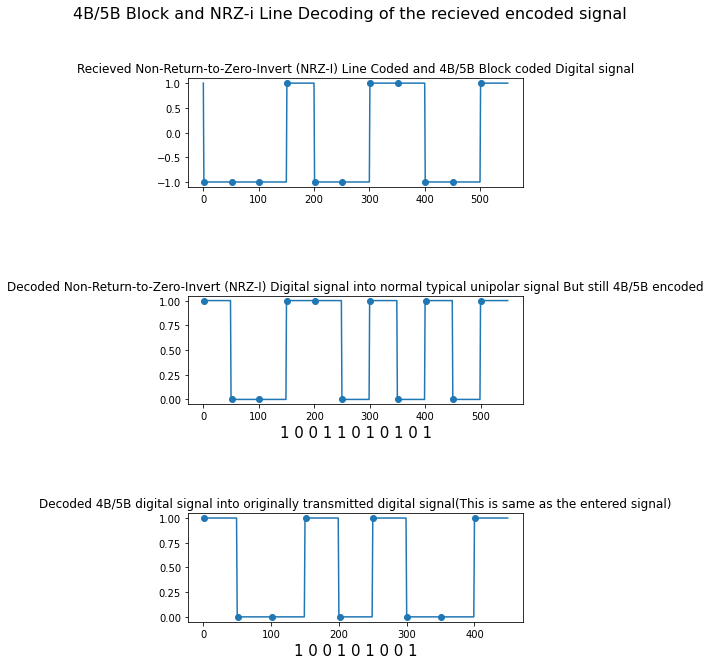

In [11]:
#Line and Block decoding

plt.figure(figsize=(6,10))
plt.suptitle("4B/5B Block and NRZ-i Line Decoding of the recieved encoded signal",fontsize=16)


#we can input a bit string which is NRZ-I encoded by uncommeneting the following 3 line and we will decode it.Now we will decode the previous NRZ-I encoded digital signal.
# inpp=input("enter a bit string that is NRZ-I line coded: ")
# rand_n=list(inpp)
# nrzi=generate_NRZ_I(rand_n)
# space_separated = " ".join(rand_n)


keys0,values0=gen_dot(nrzi)

plt.subplot(3,1,1)
plt.plot(nrzi)
plt.title('Recieved Non-Return-to-Zero-Invert (NRZ-I) Line Coded and 4B/5B Block coded Digital signal')
# plt.xlabel(space_separated,fontsize=15)
plt.scatter(keys0,values0)

#Line decoding
dsig=[]
s=len(nrzi)

if s % 2 == 0:
  a=1
  nrzi=[a , *nrzi]

sym_len=50

for i in range(1,s - sym_len+1+1, sym_len):
  if nrzi[i] == nrzi[i-1] :
    dsig.append("0") # ager bit er 1ta sample test korlei bujhe jabo je ekhon jei bit er sample niye kaj korsi sheta 1 naki 0. ager bit er last sample er value ta dekhci ekhon er ta ar ager ta same kina.same thakle 0 and else same na hole 1. evabe just last bit er 1st sample porjonto check korei bit gulo peye jassi.
  else:
    dsig.append("1")

decodenrzi=generate_Signal(dsig) # Normal traditional unipolar digital signal
space_separated = " ".join(dsig)

keys1,values1=gen_dot(decodenrzi)
plt.subplot(3,1,2)
plt.plot(decodenrzi)
plt.title('Decoded Non-Return-to-Zero-Invert (NRZ-I) Digital signal into normal typical unipolar signal But still 4B/5B encoded')
plt.xlabel(space_separated,fontsize=15)
plt.scatter(keys1,values1)


#Block Decoding
#Block decoding
# inp= input("Enter a bit string: which is 4B/5B encoded: ")
# rand_n=list(inp)

rand_n=dsig


g= len(rand_n) - len(rand_n) % 5
temp_li=[]
i=0
y=1
newsig=[] # block decoding er por bitstring
while y<=g:
  temp=rand_n.pop(i)
  temp_li.append(temp)
  
  if np.size(temp_li) == 5 :
    temp_li=temp_li[0] + temp_li[1] + temp_li[2] + temp_li[3] + temp_li[4]
    if temp_li == "11110":
      newsig.append("0")
      newsig.append("0")
      newsig.append("0")
      newsig.append("0")
    elif temp_li == "01001":
      newsig.append("0")
      newsig.append("0")
      newsig.append("0")
      newsig.append("1")
    elif temp_li == "10100":
      newsig.append("0")
      newsig.append("0")
      newsig.append("1")
      newsig.append("0")
    elif temp_li == "10101":
      newsig.append("0")
      newsig.append("0")
      newsig.append("1")
      newsig.append("1")
    elif temp_li == "01010":
      newsig.append("0")
      newsig.append("1")
      newsig.append("0")
      newsig.append("0")
    elif temp_li == "01011":
      newsig.append("0")
      newsig.append("1")
      newsig.append("0")
      newsig.append("1")
    elif temp_li == "01110":
      newsig.append("0")
      newsig.append("1")
      newsig.append("1")
      newsig.append("0")
    elif temp_li == "01111":
      newsig.append("0")
      newsig.append("1")
      newsig.append("1")
      newsig.append("1")
    elif temp_li == "10010":
      newsig.append("1")
      newsig.append("0")
      newsig.append("0")
      newsig.append("0")
    elif temp_li == "10011":
      newsig.append("1")
      newsig.append("0")
      newsig.append("0")
      newsig.append("1")
    elif temp_li == "10110":
      newsig.append("1")
      newsig.append("0")
      newsig.append("1")
      newsig.append("0")
    elif temp_li == "10111":
      newsig.append("1")
      newsig.append("0")
      newsig.append("1")
      newsig.append("1")
    elif temp_li == "11010":
      newsig.append("1")
      newsig.append("1")
      newsig.append("0")
      newsig.append("0")
    elif temp_li == "11011":
      newsig.append("1")
      newsig.append("1")
      newsig.append("0")
      newsig.append("1")
    elif temp_li == "11100":
      newsig.append("1")
      newsig.append("1")
      newsig.append("1")
      newsig.append("0")
    elif temp_li == "11101":
      newsig.append("1")
      newsig.append("1")
      newsig.append("1")
      newsig.append("1")
    
    del(temp_li)
    temp_li=[]
  y+=1



for j in rand_n:
  newsig.append(j)

decodedsig=generate_Signal(newsig)
space_separated = " ".join(newsig)
keys3,values3=gen_dot(decodedsig)



plt.subplot(3,1,3)
plt.plot(decodedsig)
plt.title('Decoded 4B/5B digital signal into originally transmitted digital signal(This is same as the entered signal)')
plt.xlabel(space_separated,fontsize=15)
plt.scatter(keys3,values3)



plt.subplots_adjust(hspace=1)
